In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
df = pd.read_csv('datos.csv', header='infer')

In [7]:
from collections import Counter
import re
import unicodedata

# Cuenta las 30 palabras más frecuentes en la columna "Asunto" (o "Asuntos") del dataframe `df`
import pandas as pd  # no re-import necesario si ya existe, pero seguro para este snippet

# elegir columna correcta
if 'Asunto' in df.columns:
    col = 'Asunto'
elif 'Asuntos' in df.columns:
    col = 'Asuntos'
else:
    raise KeyError("No existe la columna 'Asunto' ni 'Asuntos' en el DataFrame")

# lista básica de stopwords en español (puedes ampliarla)
spanish_stopwords = {
    'y', 'de', 'la', 'el', 'en', 'que', 'a', 'con', 'para', 'por', 'se', 'un', 'una',
    'los', 'las', 'del', 'al', 'mi', 'me', 'su', 'sus', 'no', 'es', 'sobre', 'como',
    'mas', 'más', 'le', 'les', 'ha', 'o', 'pero', 'si', 'porqué', 'porque', 'este',
    'esta', 'estos', 'estas', 'fue', 'han', 'haber', 'tener', 'tengo', 'toda', 'todo'
}

def normalize_and_tokenize(text):
    if pd.isna(text):
        return []
    # normalizar y quitar acentos
    text = str(text)
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    text = text.lower()
    # mantener sólo letras y espacios
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = [w for w in text.split() if w and w not in spanish_stopwords]
    return tokens

# construir contador
counter = Counter()
for val in df[col]:
    counter.update(normalize_and_tokenize(val))

# top 30
top30 = counter.most_common(31)
top30_df = pd.DataFrame(top30, columns=['word', 'count'])
top30_df

,word,count
0,tren,814
1,retraso,808
2,problemas,375
3,perdido,323
4,billete,309
5,personal,261
6,informacion,254
7,mejorar,244
8,sin,215
9,cancelacion,211


In [15]:
# Matriz de co-ocurrencia (cuántas filas contienen a la vez cada par del top 30)
# Usa `words` si existe, si no, toma las 30 primeras palabras de `top30_df`
try:
    top_words = words
except NameError:
    top_words = top30_df['word'].astype(str).iloc[:30].tolist()

# Asegurarse de que la columna correcta esté definida (usa `col` si existe)
col_name = col if 'col' in globals() else 'Asunto'

# Construir una matriz booleana de presencia (filas x palabras)
presence = {w: [] for w in top_words}
for texto in df[col_name]:
    tokens = set(normalize_and_tokenize(texto))
    for w in top_words:
        presence[w].append(1 if w in tokens else 0)

presence_df = pd.DataFrame(presence, index=df.index).astype(int)

# Matriz de co-ocurrencia: producto de la transpuesta por la matriz (palabras x palabras)
cooccurrence_df = presence_df.T.dot(presence_df)

# Opcional: ordenar filas/columnas según la lista original de palabras
cooccurrence_df = cooccurrence_df.loc[top_words, top_words]

# Mostrar resultados
cooccurrence_df

,tren,retraso,problemas,perdido,billete,personal,informacion,mejorar,sin,cancelacion,...,reserva,debido,servicio,minutos,parte,reservado,estacion,ocupado,aire,acondicionado
tren,814,172,89,0,0,73,0,0,95,211,...,89,0,32,0,101,73,0,0,0,0
retraso,172,808,89,0,0,86,70,0,73,0,...,0,158,0,155,0,0,0,0,0,0
problemas,89,89,375,0,146,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perdido,0,0,0,323,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
billete,0,0,146,0,309,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
personal,73,86,0,0,0,261,0,0,0,45,...,0,86,22,0,80,0,0,0,0,0
informacion,0,70,0,0,0,0,254,87,0,0,...,0,0,54,0,0,0,0,0,0,0
mejorar,0,0,0,0,0,0,87,244,0,0,...,0,0,0,0,0,0,0,0,0,0
sin,95,73,0,0,0,0,0,0,215,56,...,0,0,0,73,0,0,0,0,0,0
cancelacion,211,0,0,0,0,45,0,0,56,211,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Top 10 pares de palabras (dos palabras) del top 30 que aparecen juntas en la misma fila
# Usa la matriz de co-ocurrencia ya calculada: `cooccurrence_df`

# Tomar solo la mitad superior (sin diagonal) para evitar duplicados y auto-pares
mask = np.triu(np.ones(cooccurrence_df.shape, dtype=bool), k=1)
pairs_long = cooccurrence_df.where(mask).stack().reset_index()
pairs_long.columns = ['palabra_1', 'palabra_2', 'count']

# Ordenar y obtener top 10
top10_pairs = pairs_long.sort_values('count', ascending=False).head(10).reset_index(drop=True)

# Mostrar resultados
print("Top 10 pares de palabras más frecuentes (aparecen en la misma fila):")
print(top10_pairs.to_string(index=False))

# Opcional: crear una columna con el par como string
top10_pairs['par'] = top10_pairs['palabra_1'] + " + " + top10_pairs['palabra_2']
top10_pairs[['par', 'count']]

Top 10 pares de palabras más frecuentes (aparecen en la misma fila):
palabra_1     palabra_2  count
     tren   cancelacion  211.0
  retraso       causado  172.0
     tren       retraso  172.0
  retraso         habia  164.0
  retraso        debido  158.0
  retraso       minutos  155.0
     aire acondicionado  146.0
problemas       billete  146.0
 personal         falta  131.0
  mejorar    sugerencia  113.0


,par,count
0,tren + cancelacion,211.0
1,retraso + causado,172.0
2,tren + retraso,172.0
3,retraso + habia,164.0
4,retraso + debido,158.0
5,retraso + minutos,155.0
6,aire + acondicionado,146.0
7,problemas + billete,146.0
8,personal + falta,131.0
9,mejorar + sugerencia,113.0


In [28]:
from itertools import combinations
from collections import Counter
import pandas as pd

# Usar presence_df y top_words existentes
if 'presence_df' not in globals():
    raise NameError("No se encuentra `presence_df`. Ejecuta las celdas anteriores que la crean.")

pw = [w for w in top_words]  # mantener orden original
pos = {w: i for i, w in enumerate(pw)}

triple_counter = Counter()
# Para cada fila, obtener las palabras presentes y contar todas las combinaciones de 3
for _, row in presence_df[pw].iterrows():
    present = [w for w, v in row.items() if v]
    if len(present) < 3:
        continue
    # generar combinaciones y normalizar orden según top_words
    for combo in combinations(present, 3):
        ordered = tuple(sorted(combo, key=lambda w: pos[w]))
        triple_counter[ordered] += 1

# Top 10 triples más frecuentes
top10_triples = triple_counter.most_common(10)

# Construir dataframe de salida
total = globals().get('total_docs', presence_df.shape[0])
rows = []
for triple, cnt in top10_triples:
    rows.append({
        'triple': " + ".join(triple),
        'count': cnt,
        'proportion_of_docs': cnt / total
    })

top10_triples_df = pd.DataFrame(rows, columns=['triple', 'count', 'proportion_of_docs'])
top10_triples_df

,triple,count,proportion_of_docs
0,tren + retraso + problemas,89,0.0178
1,tren + retraso + causado,89,0.0178
2,tren + problemas + causado,89,0.0178
3,retraso + problemas + causado,89,0.0178
4,informacion + mejorar + sugerencia,87,0.0174
5,retraso + personal + falta,86,0.0172
6,retraso + personal + debido,86,0.0172
7,retraso + falta + debido,86,0.0172
8,personal + falta + debido,86,0.0172
9,retraso + habia + minutos,82,0.0164


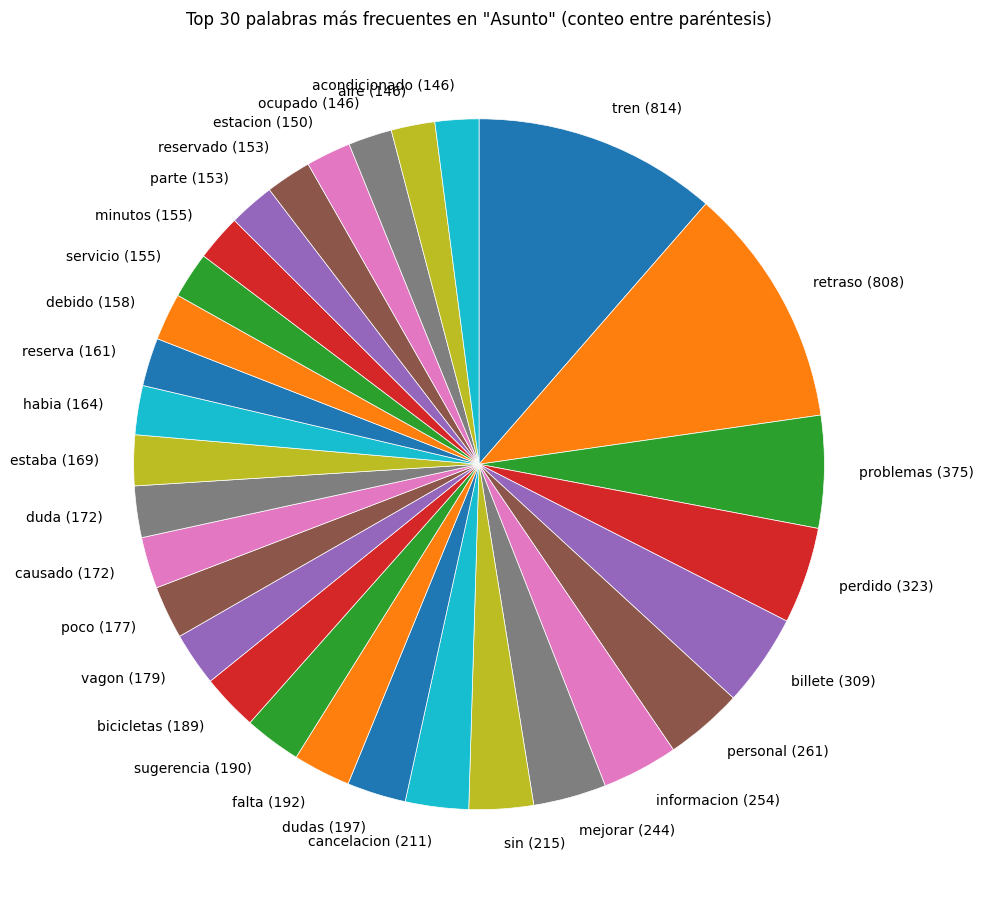

Top 30 palabras y número de repeticiones en 'Asunto':
         word  count
         tren    814
      retraso    808
    problemas    375
      perdido    323
      billete    309
     personal    261
  informacion    254
      mejorar    244
          sin    215
  cancelacion    211
        dudas    197
        falta    192
   sugerencia    190
   bicicletas    189
        vagon    179
         poco    177
      causado    172
         duda    172
       estaba    169
        habia    164
      reserva    161
       debido    158
     servicio    155
      minutos    155
        parte    153
    reservado    153
     estacion    150
      ocupado    146
         aire    146
acondicionado    146


In [14]:
# Pie chart del top 30 palabras más frecuentes en la columna 'Asunto'
try:
    data = top30_df.copy()
except NameError:
    if 'Asunto' not in df.columns:
        raise KeyError("No existe la columna 'Asunto' en el DataFrame")
    asunto_counter = Counter()
    for val in df['Asunto']:
        asunto_counter.update(normalize_and_tokenize(val))
    data = pd.DataFrame(asunto_counter.most_common(30), columns=['word', 'count'])

# Asegurar solo top 30
data = data.iloc[:30].reset_index(drop=True)
words = data['word'].astype(str).tolist()
counts = data['count'].tolist()

# Gráfico de pastel con el conteo escrito en las etiquetas
fig, ax = plt.subplots(figsize=(10, 10))
labels = [f"{w} ({c})" for w, c in zip(words, counts)]
ax.pie(counts, labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})
ax.set_title('Top 30 palabras más frecuentes en "Asunto" (conteo entre paréntesis)')
plt.tight_layout()
plt.show()

# Mostrar la tabla con las palabras y sus conteos
print("Top 30 palabras y número de repeticiones en 'Asunto':")
print(data.to_string(index=False))

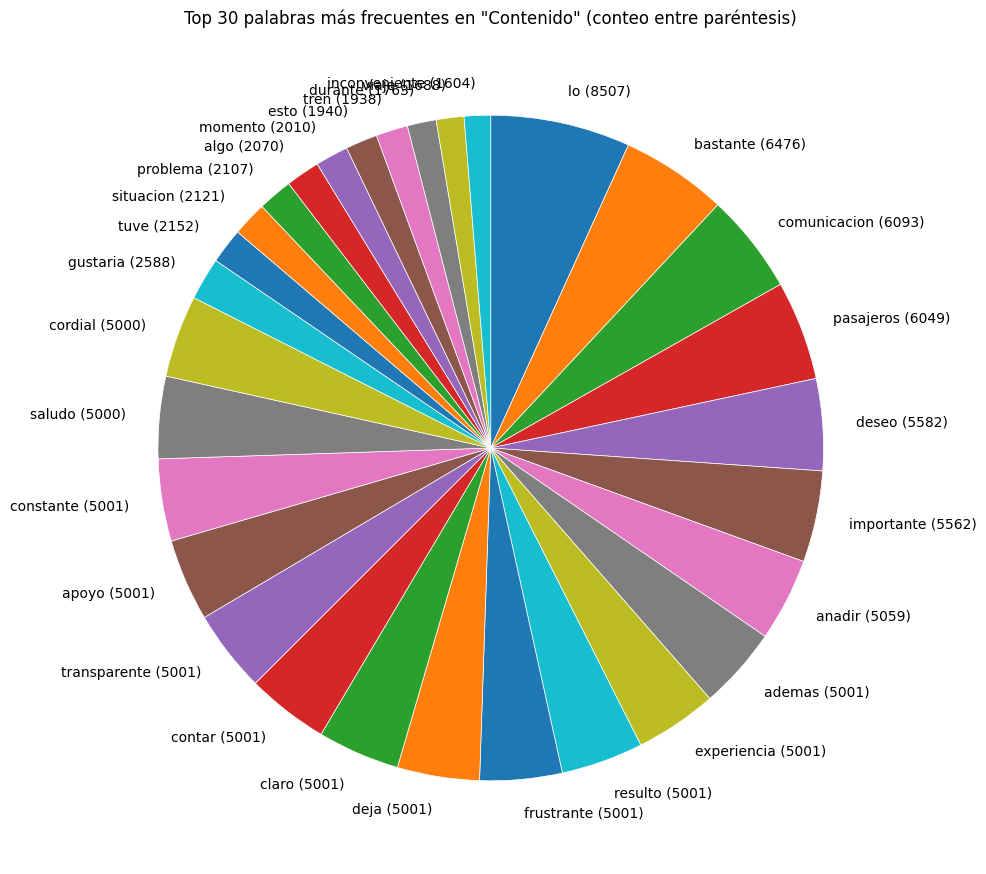

Top 30 palabras y número de repeticiones:
         word  count
           lo   8507
     bastante   6476
 comunicacion   6093
    pasajeros   6049
        deseo   5582
   importante   5562
       anadir   5059
       ademas   5001
  experiencia   5001
      resulto   5001
   frustrante   5001
         deja   5001
        claro   5001
       contar   5001
 transparente   5001
        apoyo   5001
    constante   5001
       saludo   5000
      cordial   5000
     gustaria   2588
         tuve   2152
    situacion   2121
     problema   2107
         algo   2070
      momento   2010
         esto   1940
         tren   1938
      durante   1763
        viaje   1688
inconveniente   1604


In [13]:
from collections import Counter

# Grafico de pastel del top 30 palabras en 'Contenido' y mostrar el número de repeticiones
# Usa `content_top30_df` si existe (definido en otra celda). Si no, se intenta regenerar desde `df`.
try:
    data = content_top30_df.copy()
except NameError:
    # `normalize_and_tokenize` y `spanish_stopwords` deberían existir en otras celdas
    try:
        content_counter = Counter()
        for val in df['Contenido']:
            content_counter.update(normalize_and_tokenize(val))
        content_top30 = content_counter.most_common(30)
        data = pd.DataFrame(content_top30, columns=['word', 'count'])
    except Exception as e:
        raise RuntimeError("No se encuentra `content_top30_df` y no fue posible reconstruirlo. Ejecuta la celda que calcula el top de 'Contenido'.") from e

# Asegurar solo top 30
data = data.iloc[:30].reset_index(drop=True)
words = data['word'].astype(str).tolist()
counts = data['count'].tolist()

# Pie chart
fig, ax = plt.subplots(figsize=(10,10))
labels = [f"{w} ({c})" for w, c in zip(words, counts)]  # palabra (conteo)
ax.pie(counts, labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':0.5, 'edgecolor':'white'})
ax.set_title('Top 30 palabras más frecuentes en "Contenido" (conteo entre paréntesis)')
plt.tight_layout()
plt.show()

# Mostrar la tabla con las palabras y sus conteos
print("Top 30 palabras y número de repeticiones:")
print(data.to_string(index=False))

In [ ]:
# Top 30 palabras más frecuentes en la columna 'Contenido'
if 'Contenido' not in df.columns:
    raise KeyError("No existe la columna 'Contenido' en el DataFrame")

content_counter = Counter()
for val in df['Contenido']:
    content_counter.update(normalize_and_tokenize(val))

content_top30 = content_counter.most_common(31)
content_top30_df = pd.DataFrame(content_top30, columns=['word', 'count'])
content_top30_df

,word,count
0,lo,8507
1,bastante,6476
2,comunicacion,6093
3,pasajeros,6049
4,deseo,5582
5,importante,5562
6,anadir,5059
7,ademas,5001
8,experiencia,5001
9,resulto,5001
